In [14]:
#setup
import markupsafe
import basedosdados as bd
!pip install db-dtypes==1.3.0

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

    pyarrow (<2.0de,>=1.0.0) ; (python_version >= "3.5") and extra == 'all'
            ~~~~~^


In [2]:
#download datasets Base dos Dados
_bd_br_bd_diretorios_brasil = bd.read_table('br_bd_diretorios_brasil', 'municipio', billing_project_id="projeto-teste-1-billing-id")
_bd_br_ibge_pib = bd.read_table('br_ibge_pib', 'municipio', billing_project_id="projeto-teste-1-billing-id")
_bd_br_ibge_populacao = bd.read_table('br_ibge_populacao', 'municipio', billing_project_id="projeto-teste-1-billing-id")

Downloading: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 174388/174388 [00:01<00:00, 109215.16rows/s]


In [3]:
#selecionando colunas desejadas
municipios_dir = _bd_br_bd_diretorios_brasil[['id_municipio', 'nome', 'id_uf', 'nome_uf']]
municipios_pib = _bd_br_ibge_pib[['id_municipio', 'ano', 'pib']]
municipios_pop = _bd_br_ibge_populacao[['id_municipio', 'ano','populacao']]

municipios_pib = municipios_pib[(municipios_pib["ano"]>=2002) & (municipios_pib["ano"]<=2021)]
municipios_pop = municipios_pop[(municipios_pop["ano"]>=2002) & (municipios_pop["ano"]<=2021)]

In [4]:
#unindo os dados de pib, populacao, e pib_per_capita na mesma tabela
municipios_data = municipios_pib.copy()
municipios_data = municipios_data.merge(municipios_pop, on=["id_municipio", "ano"], how="outer")
municipios_data["pib_pc"] = municipios_data["pib"] / municipios_data["populacao"]

In [5]:
municipios_data.head(50)

,id_municipio,ano,pib,populacao,pib_pc
0,1100015,2002,1.112910e+08,27237.0,4086.022690
1,1100015,2003,1.432220e+08,27563.0,5196.168777
2,1100015,2004,1.739910e+08,29001.0,5999.482776
3,1100015,2005,1.671270e+08,28629.0,5837.682071
4,1100015,2006,1.688050e+08,29005.0,5819.858645
5,1100015,2007,1.913640e+08,23857.0,8021.293541
6,1100015,2008,2.489620e+08,24577.0,10129.877528
7,1100015,2009,2.569860e+08,24354.0,10552.106430
8,1100015,2010,2.620770e+08,24392.0,10744.383404
9,1100015,2011,2.805100e+08,24228.0,11577.926366


In [6]:
#Rio de Janeiro
#municipios_data[municipios_data["id_municipio"]=="3304557"]

In [7]:
_bd_br_denatran_frota = bd.read_table('br_denatran_frota', 'municipio_tipo', billing_project_id="projeto-teste-1-billing-id")
municipios_frota = _bd_br_denatran_frota[[	"id_municipio", "ano", "mes","tipo_veiculo", "quantidade"]]



Downloading: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29386791/29386791 [00:35<00:00, 824156.36rows/s]


In [8]:
municipios_frota = municipios_frota.sort_values(by=["id_municipio", "ano", "mes", "tipo_veiculo"])

municipios_frota.head(50)

,id_municipio,ano,mes,tipo_veiculo,quantidade
26297563,1100015,2003,1,automovel,396.0
23098049,1100015,2003,1,bonde,0.0
8318384,1100015,2003,1,caminhao,273.0
12755692,1100015,2003,1,caminhao trator,8.0
26175222,1100015,2003,1,caminhonete,96.0
24738389,1100015,2003,1,camioneta,169.0
11760602,1100015,2003,1,chassi plataforma,0.0
10632039,1100015,2003,1,ciclomotor,2.0
9767813,1100015,2003,1,micro-onibus,3.0
12755691,1100015,2003,1,motocicleta,2333.0


In [11]:
municipios_frota[(municipios_frota["id_municipio"]=="3304557") & (municipios_frota["ano"]==2019) & (municipios_frota["mes"]==12)]

,id_municipio,ano,mes,tipo_veiculo,quantidade
18823796,3304557,2019,12,automovel,2074776.0
994346,3304557,2019,12,bonde,0.0
19970231,3304557,2019,12,caminhao,43227.0
18347748,3304557,2019,12,caminhao trator,4293.0
724848,3304557,2019,12,caminhonete,133486.0
2868731,3304557,2019,12,camioneta,158251.0
2525786,3304557,2019,12,chassi plataforma,39.0
488150,3304557,2019,12,ciclomotor,9201.0
2917766,3304557,2019,12,micro-onibus,18127.0
18665593,3304557,2019,12,motocicleta,319647.0


In [12]:
municipios_frota.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29386791 entries, 26297563 to 14673215
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id_municipio  object 
 1   ano           int64  
 2   mes           int64  
 3   tipo_veiculo  object 
 4   quantidade    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.3+ GB


In [24]:
automovel = municipios_frota[(municipios_frota["tipo_veiculo"]=='automovel') & (municipios_frota["mes"]==12)]
automovel = automovel[['id_municipio', 'ano','quantidade']]
automovel.rename(columns={'quantidade': 'automoveis'}, inplace=True)
municipios_automoveis = municipios_data.merge(automovel, on=["id_municipio", "ano"], how="inner")
municipios_automoveis

,id_municipio,ano,pib,populacao,pib_pc,automoveis
0,1100015,2003,1.432220e+08,27563.0,5196.168777,431.0
1,1100015,2004,1.739910e+08,29001.0,5999.482776,441.0
2,1100015,2005,1.671270e+08,28629.0,5837.682071,499.0
3,1100015,2006,1.688050e+08,29005.0,5819.858645,538.0
4,1100015,2007,1.913640e+08,23857.0,8021.293541,623.0
...,...,...,...,...,...,...
105502,5300108,2017,2.447222e+11,3039444.0,80515.465658,1247360.0
105503,5300108,2018,2.548172e+11,2974703.0,85661.393759,1284710.0
105504,5300108,2019,2.736137e+11,3015268.0,90742.750230,1328622.0
105505,5300108,2020,2.658473e+11,3055149.0,87016.159932,1355430.0


In [25]:
municipios_automoveis[(municipios_automoveis["id_municipio"]=="3304557")] #rio de janeiro

,id_municipio,ano,pib,populacao,pib_pc,automoveis
61311,3304557,2003,9.930764e+10,5974081.0,16623.081943,1254142.0
61312,3304557,2004,1.185576e+11,6051399.0,19591.769110,1282583.0
61313,3304557,2005,1.233385e+11,6094183.0,20238.729457,1312676.0
61314,3304557,2006,1.325861e+11,6136652.0,21605.600904,1345897.0
61315,3304557,2007,1.446320e+11,6093472.0,23735.563731,1396083.0
61316,3304557,2008,1.629376e+11,6161047.0,26446.408703,1451087.0
61317,3304557,2009,1.874098e+11,6186710.0,30292.320312,1521716.0
61318,3304557,2010,2.081536e+11,6320446.0,32933.371316,1593150.0
61319,3304557,2011,2.295678e+11,6355949.0,36118.571593,1666108.0
61320,3304557,2012,2.532008e+11,6390290.0,39622.737779,1750539.0


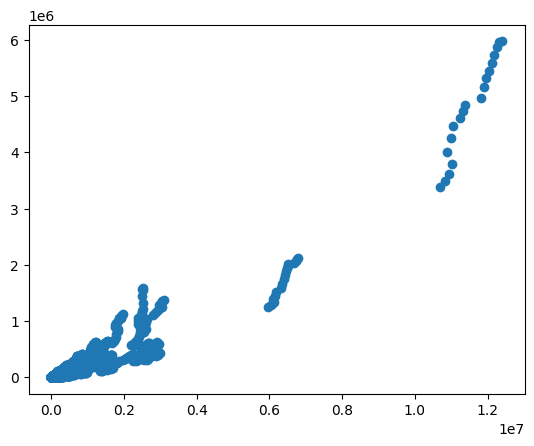

In [31]:
plt.scatter(municipios_automoveis["populacao"], municipios_automoveis["automoveis"])
plt.show()

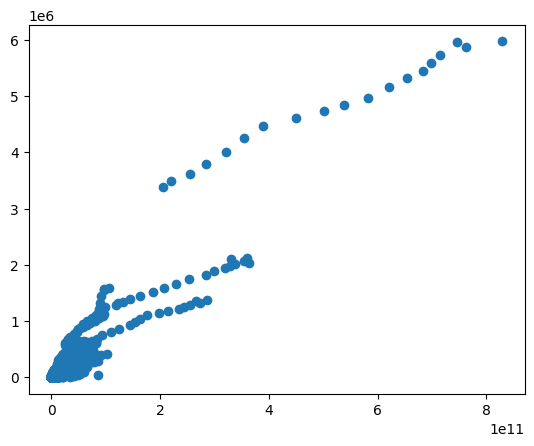

In [32]:
plt.scatter(municipios_automoveis["pib"], municipios_automoveis["automoveis"])
plt.show()

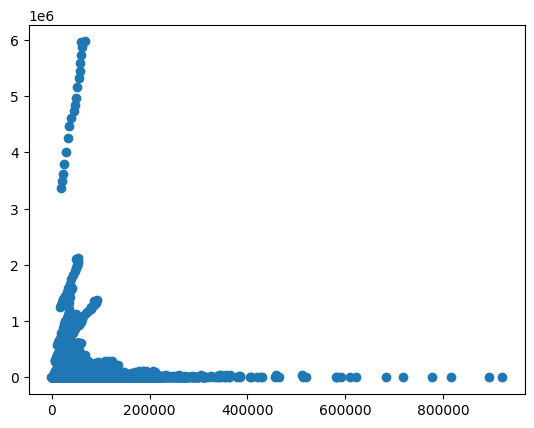

In [33]:
plt.scatter(municipios_automoveis["pib_pc"], municipios_automoveis["automoveis"])
plt.show()